# Predicting strength of steel based on steel chemistry - Data Wrangling

This project will create a model that predicts the physical strength of a steel based on its alloying elements or steel chemistry using 2 databases.

## 1.0 Loading Data

In [1]:
# Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading both datasets
path_1 = "/Users/chinmayasukumar/Documents/Springboard/Unit 7/Capstone #2/data/raw/steel_strength.csv"
path_2 = "/Users/chinmayasukumar/Documents/Springboard/Unit 7/Capstone #2/data/raw/MatNavi Mechanical properties of low-alloy steels.csv"
steel_1 = pd.read_csv(path_1)
steel_2 = pd.read_csv(path_2)

## 2.0 Exploring Data

In [3]:
print('steel_1 columns: ', steel_1.columns, '\n')
print('steel_2 columns: ', steel_2.columns)

steel_1 columns:  Index(['formula', 'c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w',
       'al', 'ti', 'yield strength', 'tensile strength', 'elongation'],
      dtype='object') 

steel_2 columns:  Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')


In [4]:
print('steel_1 dtypes: ', '\n', steel_1.dtypes, '\n')
print('steel_2 dtypes: ', '\n', steel_2.dtypes)

steel_1 dtypes:  
 formula              object
c                   float64
mn                  float64
si                  float64
cr                  float64
ni                  float64
mo                  float64
v                   float64
n                   float64
nb                  float64
co                  float64
w                   float64
al                  float64
ti                  float64
yield strength      float64
tensile strength    float64
elongation          float64
dtype: object 

steel_2 dtypes:  
 Alloy code                   object
 C                          float64
 Si                         float64
 Mn                         float64
 P                          float64
 S                          float64
 Ni                         float64
 Cr                         float64
 Mo                         float64
 Cu                         float64
V                           float64
 Al                         float64
 N                          float64
Ce

In [5]:
print('steel_1', '\n', steel_1.describe())

steel_1 
                 c          mn          si          cr          ni          mo  \
count  312.000000  312.000000  312.000000  312.000000  312.000000  312.000000   
mean     0.096442    0.146250    0.221218    8.043830    8.184006    2.766090   
std      0.109008    0.397102    0.580796    5.426169    6.337055    1.832908   
min      0.000000    0.010000    0.010000    0.010000    0.010000    0.020000   
25%      0.010000    0.010000    0.010000    3.100000    0.960000    1.500000   
50%      0.030000    0.010000    0.010000    9.050000    8.500000    2.210000   
75%      0.182500    0.080000    0.110000   12.520000   12.117500    4.090000   
max      0.430000    3.000000    4.750000   17.500000   21.000000    9.670000   

                v           n          nb          co           w          al  \
count  312.000000  312.000000  312.000000  312.000000  312.000000  312.000000   
mean     0.183750    0.005545    0.035449    7.008782    0.161282    0.239135   
std      0.452462

In [6]:
print('steel_2','\n', steel_2.describe())

steel_2 
                 C          Si          Mn           P           S          Ni  \
count  915.000000  915.000000  915.000000  915.000000  915.000000  915.000000   
mean     0.174929    0.310918    0.812962    0.014543    0.010602    0.143016   
std      0.059674    0.086871    0.342775    0.005244    0.004024    0.172746   
min      0.090000    0.180000    0.420000    0.006000    0.003000    0.000000   
25%      0.130000    0.240000    0.500000    0.010000    0.008000    0.023000   
50%      0.160000    0.300000    0.680000    0.014000    0.010000    0.050000   
75%      0.200000    0.370000    1.210000    0.018000    0.012000    0.210000   
max      0.340000    0.520000    1.480000    0.030000    0.022000    0.600000   

               Cr          Mo          Cu           V          Al           N  \
count  915.000000  915.000000  915.000000  915.000000  915.000000  915.000000   
mean     0.427861    0.442870    0.079148    0.060190    0.012435    0.007652   
std      0.457568

As it can be seen, there can be a few problems joining the data at this stage. First off, the names of the columns between datasets do not match for the same alloying element. Secondly, some dtypes are integers which could cause problems when merging. There also unneccesary columns in steel_2. 

As for the physical properties, there are no 0 or negative values which is expected however, there are a few suspicious values for the strength in the upper range which will be looked into in the data cleaning section.

## 3.0 Data Manipulation 

### 3.1 Removing temperatures not corresponding to 27 degC


From the description of both datasets, it can be seen that the physical properties for the samples in the steel_2 dataset were tested at different temperatures. It is assumed that steel_1 samples were pulled in room temperature, therefore only the tests performed at 27 degC will be included in the final dataset.

In [7]:
# Rename temperature column for convenience
steel_2 = steel_2.rename(columns = {' Temperature (°C)':'Temperature'})
print(steel_2.columns)

# Remove temperatures > 27 degC from steel_2
print(steel_2['Temperature'].value_counts())
steel_2 = steel_2[steel_2['Temperature']==27]
print(steel_2['Temperature'].value_counts())

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', 'Temperature',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')
27     95
100    95
200    95
300    95
400    95
450    95
500    95
550    95
600    76
350    45
650    30
150     2
250     2
Name: Temperature, dtype: int64
27    95
Name: Temperature, dtype: int64


### 3.2 Renaming columns

In order for the columns to join, the alloying elements must be renames. Incongruent columns must also be dropped.

In [8]:
# Remove unneccesary columns and rename
steel_2 = steel_2.drop(columns = ['Temperature',' Reduction in Area (%)', 'Alloy code', 'Ceq', 'Nb + Ta'])
print(steel_2.columns)

steel_1 = steel_1.drop(columns = ['formula'])
print(steel_1.columns)

steel_2.columns = ['c', 'si', 'mn', 'p', 's', 'ni', 'cr', 'mo', 'cu', 'v', 'al', 'n', 'yield strength', 'tensile strength', 'elongation']
steel_2.columns


Index([' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al',
       ' N', ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)'],
      dtype='object')
Index(['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al',
       'ti', 'yield strength', 'tensile strength', 'elongation'],
      dtype='object')


Index(['c', 'si', 'mn', 'p', 's', 'ni', 'cr', 'mo', 'cu', 'v', 'al', 'n',
       'yield strength', 'tensile strength', 'elongation'],
      dtype='object')

## 4.0 Joining

pd.concat is used to join the two datasets

In [9]:
# Join data sets
print(steel_1.shape)
print(steel_2.shape)

steel = pd.concat([steel_1, steel_2], ignore_index=True, sort=False)
print(steel.columns)
print(steel.shape)

(312, 16)
(95, 15)
Index(['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al',
       'ti', 'yield strength', 'tensile strength', 'elongation', 'p', 's',
       'cu'],
      dtype='object')
(407, 19)


## 5.0 Data Cleaning

### 5.1 Imputing missing values

In [10]:
# Finding N/A values
print(steel.dtypes)
print(steel.isna().sum())

c                   float64
mn                  float64
si                  float64
cr                  float64
ni                  float64
mo                  float64
v                   float64
n                   float64
nb                  float64
co                  float64
w                   float64
al                  float64
ti                  float64
yield strength      float64
tensile strength    float64
elongation          float64
p                   float64
s                   float64
cu                  float64
dtype: object
c                     0
mn                    0
si                    0
cr                    0
ni                    0
mo                    0
v                     0
n                     0
nb                   95
co                   95
w                    95
al                    0
ti                   95
yield strength        0
tensile strength      0
elongation            9
p                   312
s                   312
cu                  31

In [11]:
print(steel[steel['nb'].isna()].head(10))

        c    mn    si    cr     ni    mo    v       n  nb  co   w     al  ti  \
312  0.12  0.52  0.36  0.97  0.089  0.61  0.0  0.0066 NaN NaN NaN  0.003 NaN   
313  0.09  0.49  0.37  0.98  0.055  0.57  0.0  0.0080 NaN NaN NaN  0.005 NaN   
314  0.10  0.49  0.28  0.90  0.028  0.56  0.0  0.0090 NaN NaN NaN  0.006 NaN   
315  0.12  0.48  0.43  0.96  0.051  0.56  0.0  0.0080 NaN NaN NaN  0.006 NaN   
316  0.12  0.44  0.28  0.99  0.030  0.54  0.0  0.0100 NaN NaN NaN  0.007 NaN   
317  0.12  0.45  0.37  1.00  0.035  0.50  0.0  0.0088 NaN NaN NaN  0.009 NaN   
318  0.12  0.45  0.36  1.00  0.028  0.53  0.0  0.0080 NaN NaN NaN  0.007 NaN   
319  0.10  0.44  0.35  1.01  0.050  0.51  0.0  0.0082 NaN NaN NaN  0.012 NaN   
320  0.09  0.48  0.32  1.05  0.023  0.52  0.0  0.0089 NaN NaN NaN  0.009 NaN   
321  0.10  0.51  0.31  1.03  0.020  0.53  0.0  0.0076 NaN NaN NaN  0.009 NaN   

     yield strength  tensile strength  elongation      p      s    cu  
312           342.0             490.0        30

As it can be seen there are 95 missing values in Nb, Co, W and Ti. Since these points still show data for the other alloying elements they can be imputed with a 0 value since they probably do not have the alloying element in question. However, the 9 missing elongation values could skew the data and therefore the rows with empty elongation values will be removed.

In [12]:
steel = steel[~steel['elongation'].isna()]
print(steel.shape)

(398, 19)


In [13]:
steel = steel.fillna(0)
print(steel.isna().sum())
steel.shape

c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          0
p                   0
s                   0
cu                  0
dtype: int64


(398, 19)

The dataset must now be evaluated for the outlying tensile and yield strenghts.

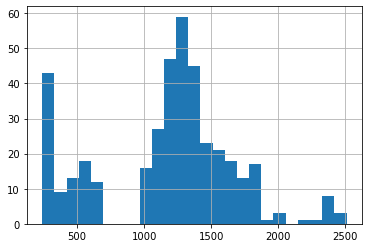

In [14]:
steel['yield strength'].hist(bins=25)
plt.show()

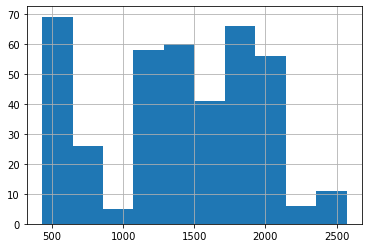

In [15]:
steel['tensile strength'].hist()
plt.show()

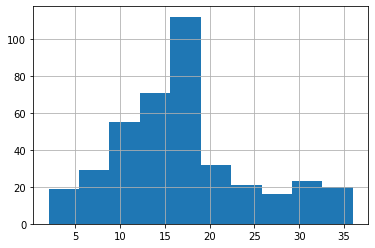

In [16]:
steel['elongation'].hist()
plt.show()

In [17]:
steel['yield strength'].sort_values(ascending=False).head(10)

20     2510.3
6      2501.1
3      2487.3
0      2411.5
10     2411.5
13     2402.3
30     2381.6
16     2381.6
21     2372.4
107    2356.4
Name: yield strength, dtype: float64

In [18]:
steel['tensile strength'].sort_values(ascending=False).head(10)

6      2570.0
20     2570.0
3      2514.9
10     2475.8
0      2473.5
13     2468.9
21     2441.3
30     2436.8
16     2436.8
107    2404.6
Name: tensile strength, dtype: float64

In [19]:
steel['elongation'].sort_values(ascending=False).head(10)

335    36.0
337    36.0
368    36.0
319    36.0
334    35.0
318    35.0
332    35.0
131    35.0
333    34.0
331    34.0
Name: elongation, dtype: float64

The data with the erroneous yield strength value has already been eliminated, therefore no further cleaning is required

In [20]:
steel.describe()

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation,p,s,cu
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.116467,0.305930,0.246985,6.169749,6.231106,2.240977,0.155920,0.006168,0.027563,5.280352,0.125729,0.183515,0.230930,1175.626633,1383.526633,17.023116,0.003455,0.002530,0.018744
std,0.104438,0.477588,0.515953,5.765578,6.545468,1.906021,0.406029,0.016264,0.143754,6.235153,0.817160,0.314814,0.506307,506.849212,550.051167,7.580671,0.006685,0.004932,0.043925
min,0.000000,0.010000,0.010000,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,0.000000,239.000000,430.000000,2.000000,0.000000,0.000000,0.000000
25%,0.020000,0.010000,0.010000,0.053250,0.050000,0.522500,0.010000,0.000000,0.010000,0.010000,0.000000,0.030000,0.000000,1017.050000,1067.075000,12.000000,0.000000,0.000000,0.000000
50%,0.120000,0.050000,0.060000,5.005000,4.050000,1.980000,0.010000,0.000000,0.010000,0.010000,0.000000,0.030000,0.000000,1267.450000,1413.800000,16.000000,0.000000,0.000000,0.000000
75%,0.190000,0.500000,0.300000,12.297500,11.075000,3.150000,0.070000,0.007000,0.010000,12.400000,0.000000,0.167500,0.200000,1460.700000,1794.875000,19.300000,0.000000,0.000000,0.000000
max,0.430000,3.000000,4.750000,17.500000,21.000000,9.670000,4.320000,0.150000,2.500000,20.100000,9.180000,1.800000,2.500000,2510.300000,2570.000000,36.000000,0.030000,0.022000,0.250000
